# Story telling and exploratory analysis.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_pickle("../data/train_data_wrangle.plk")

## We sample the training data, find any patterns which can catch our attention.

### Firstly in the given sample what is the distribution of males and females.

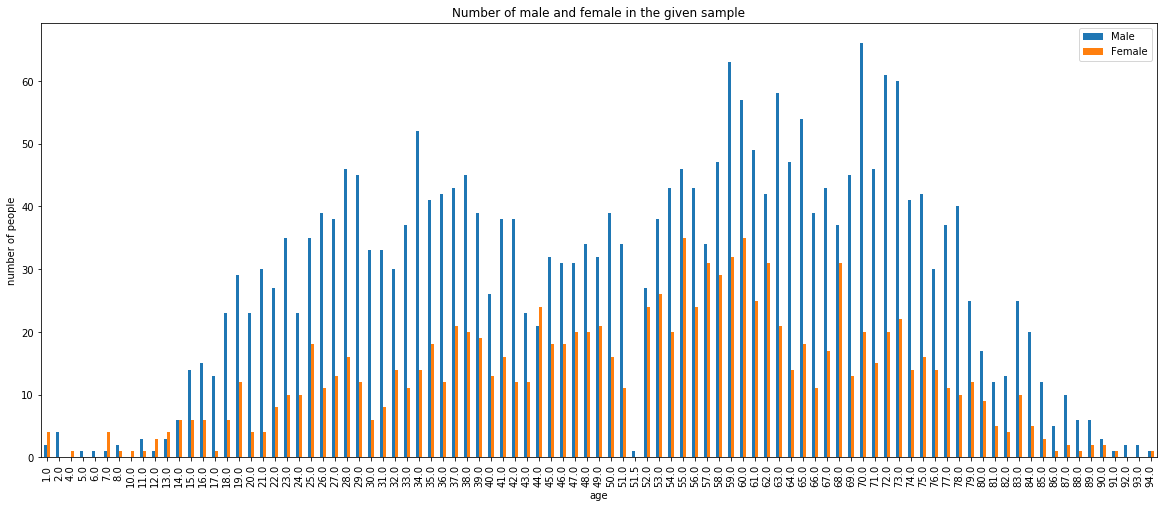

In [3]:
ct1 = pd.crosstab(index=train_df['age'],columns=train_df['sex'])
ct1.plot(kind='bar',figsize=(20,8), stacked=False).legend(('Male','Female'))
plt.title('Number of male and female in the given sample')
plt.ylabel('number of people')
plt.show()

### From the above distribution males are more than females in the sample.

## Thyroid disease can be classified into 3 classes.
## 1. Hyperthyroid
## 2. Hypothyroid
## 3. Normal

### Let's see the percentage of people who are normal in the given sample.

In [4]:
classes = ['hyperthyroid','hypothyroid','normal']

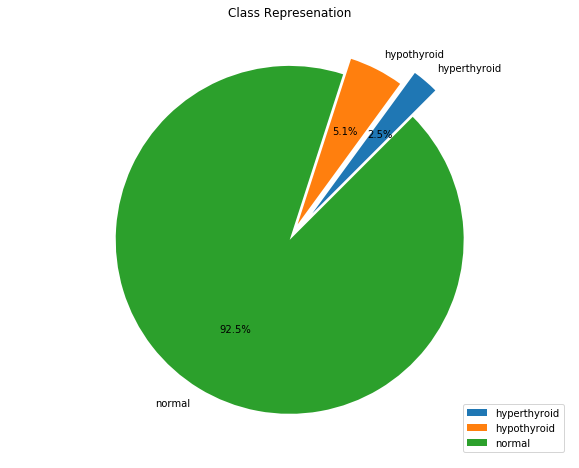

In [5]:
plt.subplots(figsize=(10,8))
class_cnt = train_df['age'].groupby(train_df['class']).count()
plt.axis('equal')
plt.pie(class_cnt, startangle=45, labels=classes, shadow=False, explode=(0.2,0.1,0), autopct='%1.1f%%')
plt.legend(classes, loc=4)
plt.title('Class Represenation')
plt.show()

### We see only 2.5% of the sample suffer from hyperthyroid condition.

### Now from the sample, group males and females by the class, find the number of people in each class.

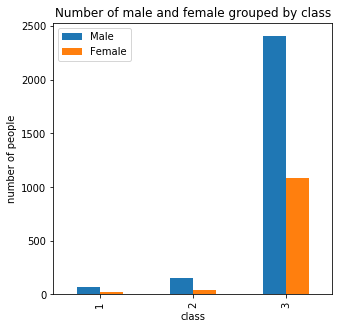

In [6]:
ct2 = pd.crosstab(index=train_df['class'],columns=train_df['sex'])
ct2.plot(kind='bar',figsize=(5,5), stacked=False).legend(('Male','Female'))#, loc='best')
plt.title('Number of male and female grouped by class')
plt.ylabel('number of people')
plt.show()

### Let's classify according to class, and plot them

Text(0.5,1,'Number of age groups classified by class')

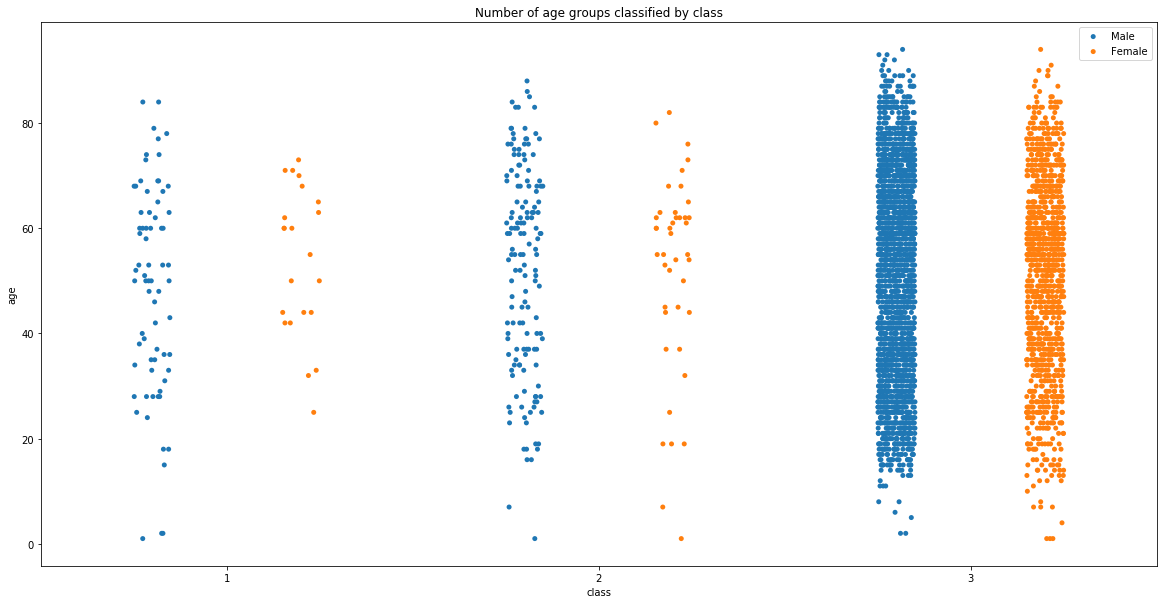

In [7]:
plt.figure(figsize=(20,10))
sns.stripplot(x='class', y='age', data=train_df, jitter=True, dodge=True, hue='sex').legend(('Male','Female'))
plt.title('Number of age groups classified by class')

### Split by sex

Text(0.5,1,'Distribution of age group classified by class, split by sex')

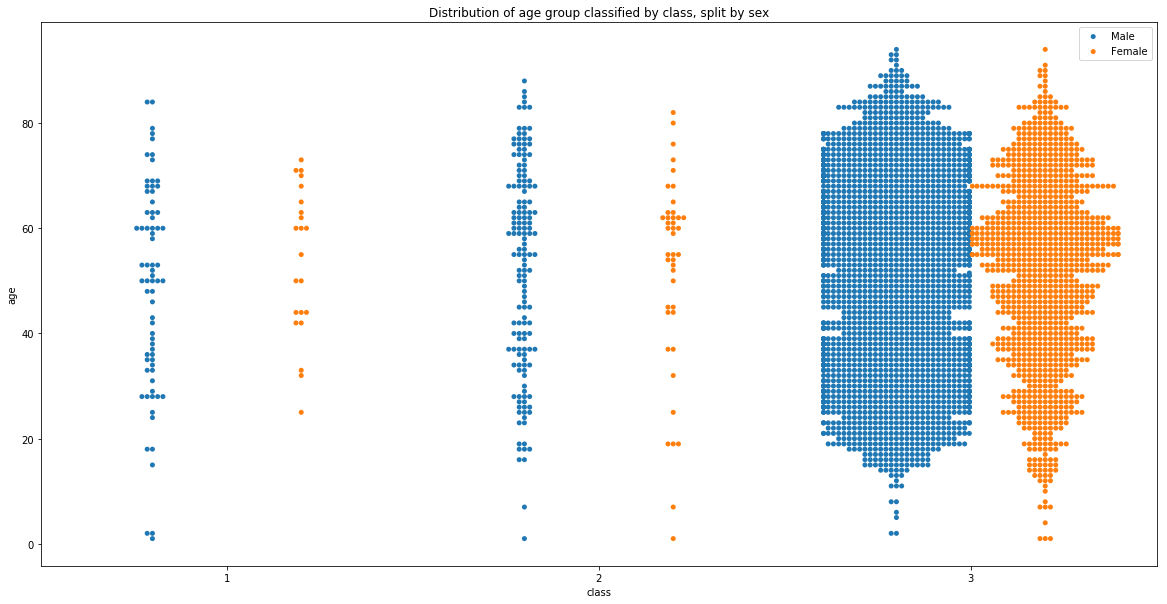

In [8]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='class', y='age', data=train_df, hue='sex', dodge=True).legend(('Male','Female'))
plt.title('Distribution of age group classified by class, split by sex')

### Above we see the age distribution of males, females classified by class.

### Let's get some analysis on checking whether there are corelations between conditions and age.

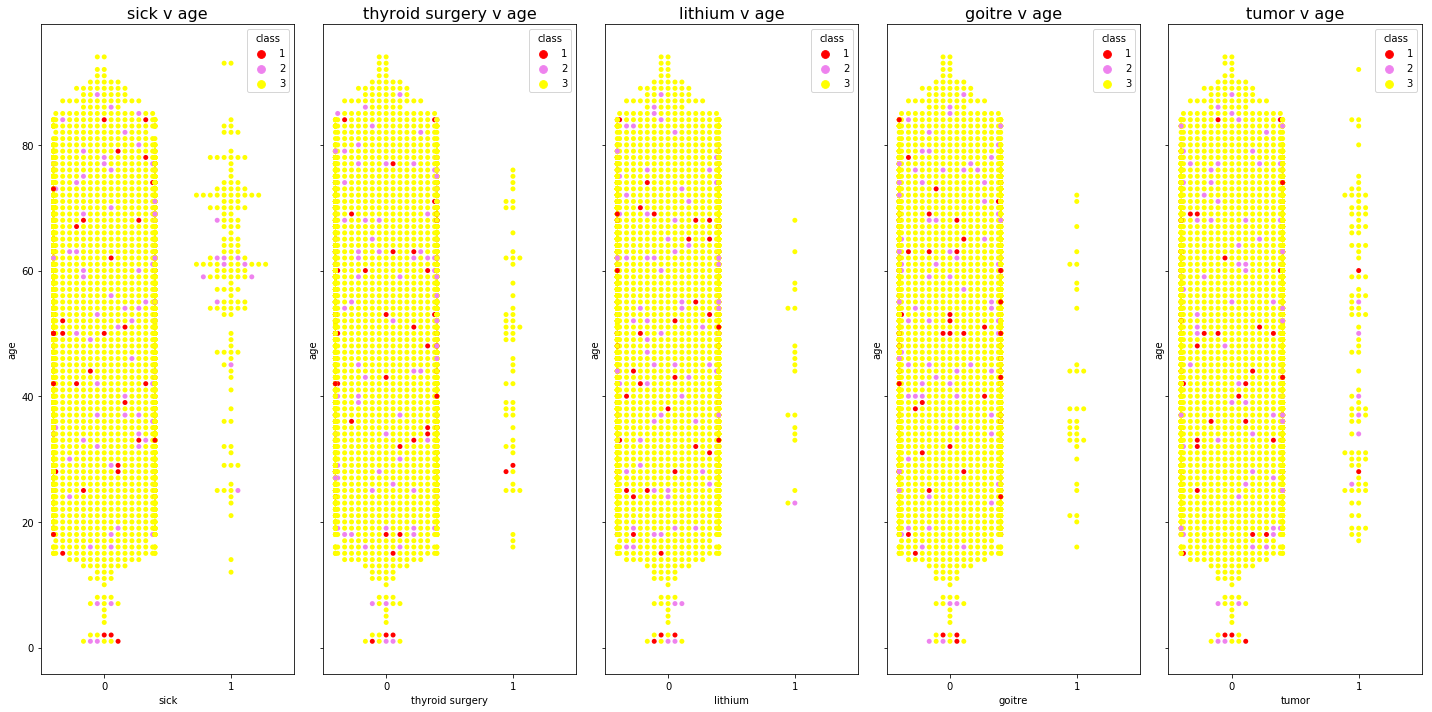

In [9]:
colorMap = {3:'yellow',2:'violet',1:'red'}
x_colnames = ['sick','thyroid surgery','lithium','goitre','tumor']

f, ax = plt.subplots(1,len(x_colnames),figsize=(20,10), sharex=True, sharey=True)
for i in range(len(x_colnames)):
    sns.swarmplot(x=train_df[x_colnames[i]], y=train_df['age'], data=train_df,hue='class', palette=colorMap, ax=ax[i])
    ax[i].set_title(str(x_colnames[i]) +" v age", fontsize=16)
plt.tight_layout()

### Similarly let's get count of males, females with conditions

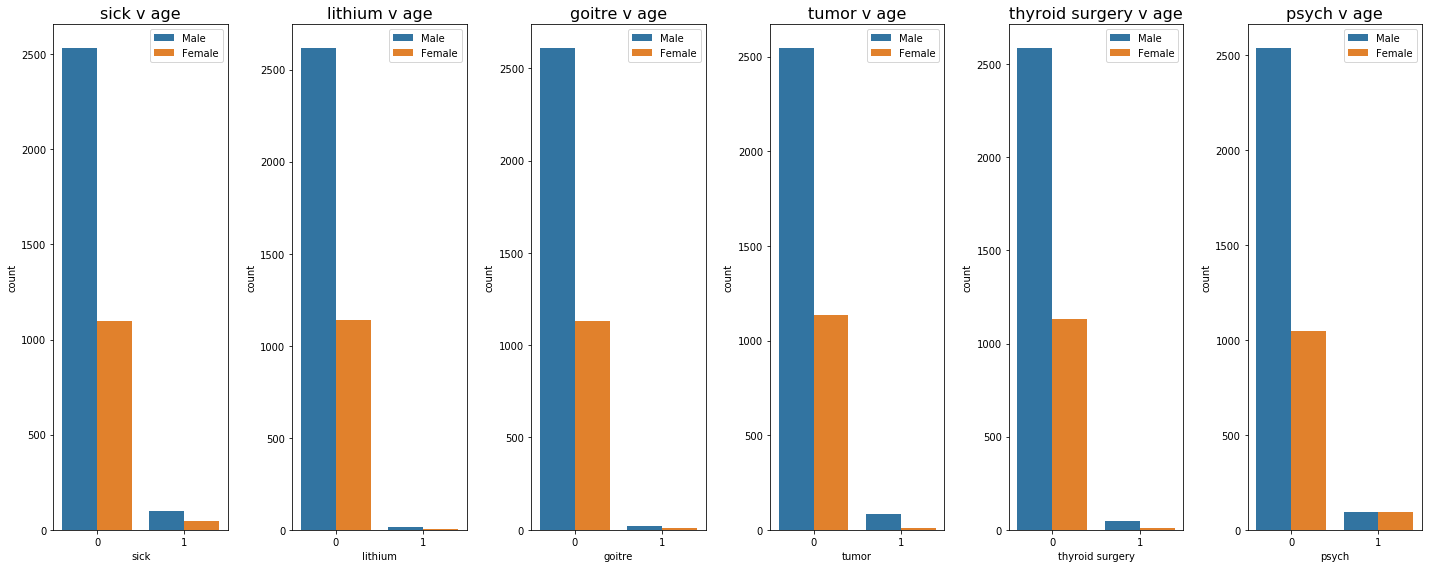

In [10]:
x_colnames = ['sick','lithium','goitre','tumor', 'thyroid surgery', 'psych']
f, ax = plt.subplots(1,len(x_colnames),figsize=(20,8), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    sns.countplot(x=x_colnames[i], data=train_df, ax=ax[i], hue='sex').legend(('Male','Female'))
    ax[i].set_title(str(x_colnames[i]) +" v age", fontsize=16)
plt.tight_layout()

### Density distributions of measurements

In [11]:
continuous_cols = ["TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured"]

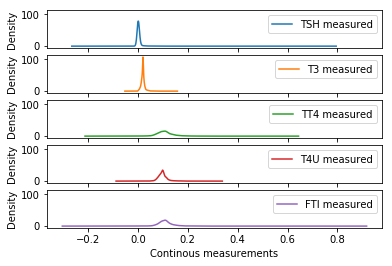

In [12]:
train_df[continuous_cols].plot(kind='density', subplots=True, layout=(5,1), sharex=True, sharey=True)
plt.xlabel('Continous measurements')
plt.show()

### Let's plot kde distributions w.r.t age.

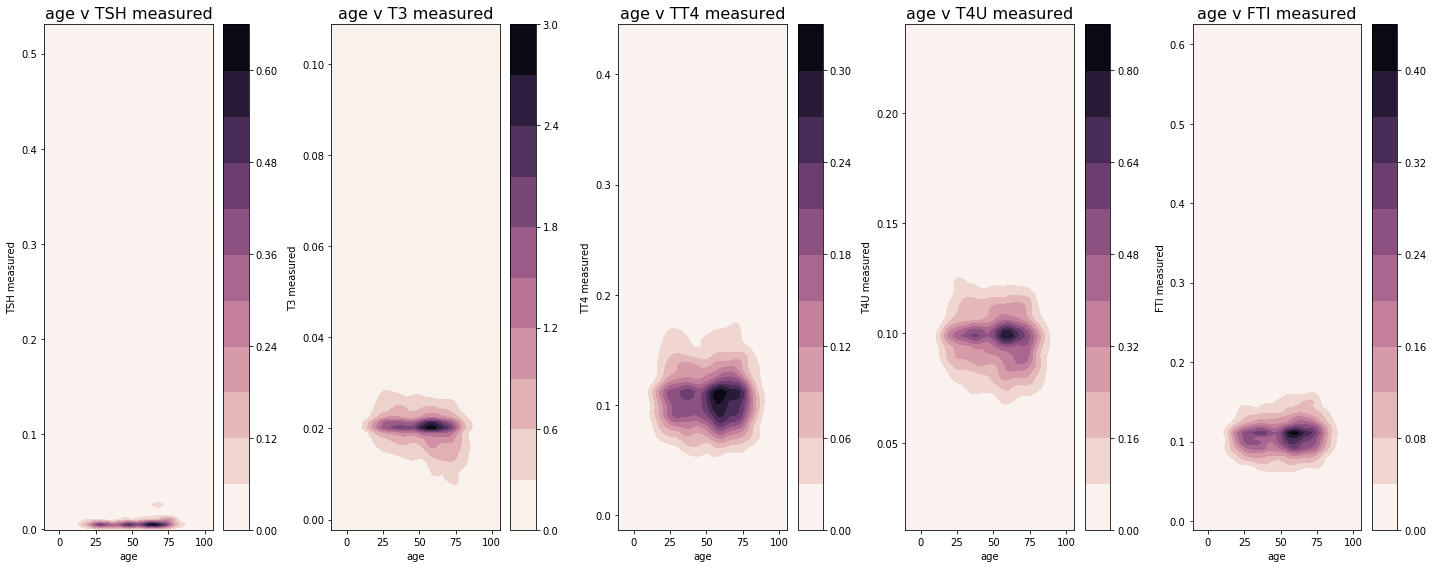

In [13]:
f, ax = plt.subplots(1,len(continuous_cols),figsize=(20,8), sharex=True, sharey=False)
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
for i in range(len(continuous_cols)):
    sns.kdeplot(train_df['age'], train_df[continuous_cols[i]],ax=ax[i], cmap=cmap,cbar=True,shade=True)
    ax[i].set_title("age v " + str(continuous_cols[i]), fontsize=16)
plt.tight_layout()

### We see as age increases, measurements increase.

### Now let's split the measurements based on gender and see some patterns.

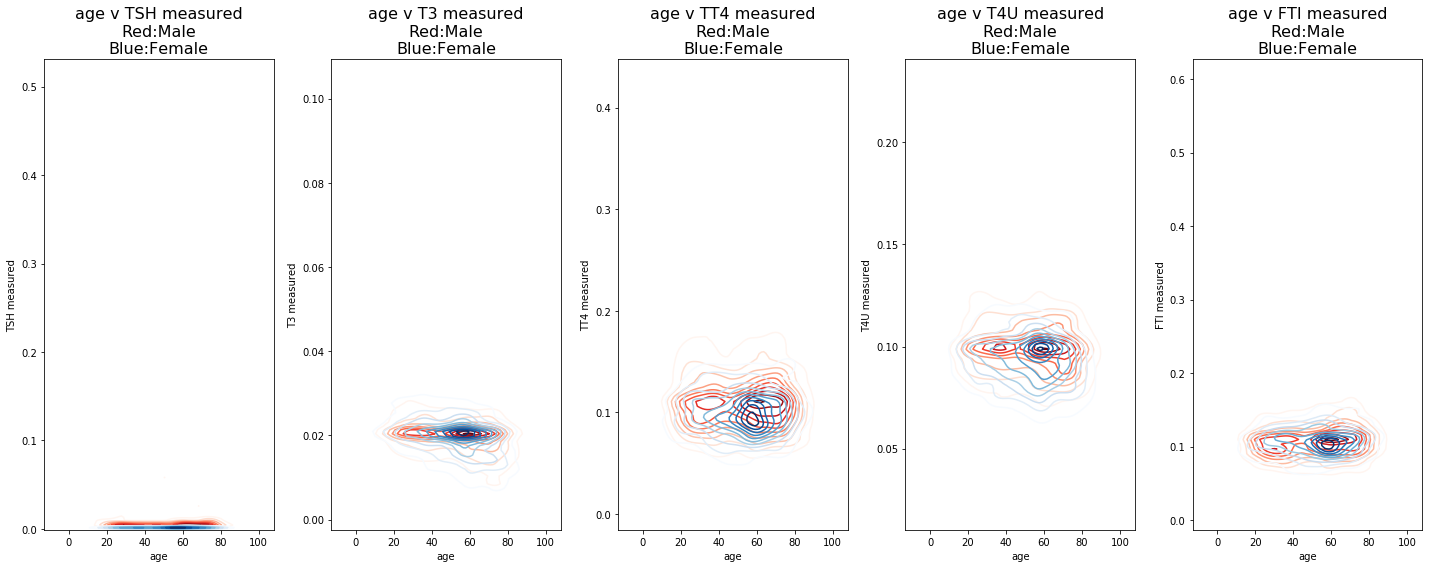

In [14]:
males= train_df.loc[(train_df['sex']==0)]
females = train_df.loc[(train_df['sex']==1)]
f, ax = plt.subplots(1,len(continuous_cols),figsize=(20,8), sharex=True, sharey=False)

for i in range(len(continuous_cols)):
    sns.kdeplot(males['age'], males[continuous_cols[i]],ax=ax[i], cmap='Reds', shade=False)
    sns.kdeplot(females['age'], females[continuous_cols[i]],ax=ax[i], cmap='Blues', shade=False)
    ax[i].set_title("age v " + str(continuous_cols[i]) + '\nRed:Male\nBlue:Female', fontsize=16)
plt.tight_layout()

## Pickout the Hyperthyroid class, see some distributions.

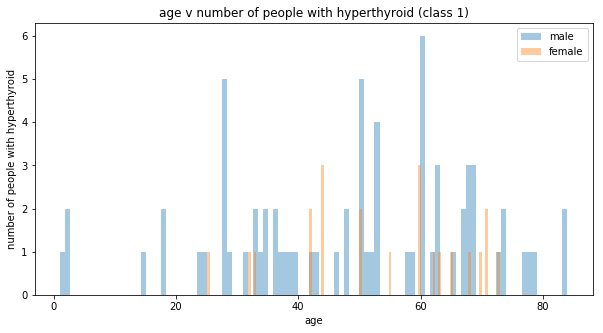

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
male_thyroid = train_df.loc[(train_df['sex']==0) & (train_df['class']==1)]
female_thyroid = train_df.loc[(train_df['sex']==1) & (train_df['class']==1)]
sns.distplot(male_thyroid['age'], bins=100, kde=False, label="male")
sns.distplot(female_thyroid['age'], bins=100, kde=False, label="female")
plt.legend()
plt.ylabel('number of people with hyperthyroid')
plt.title('age v number of people with hyperthyroid (class 1)')
plt.show()

### Number of males, females suffering from hyperthyroid.

In [16]:
print(male_thyroid.shape)
print(female_thyroid.shape)

(71, 22)
(22, 22)


### Let's see whether do they suffer from additional issues ?

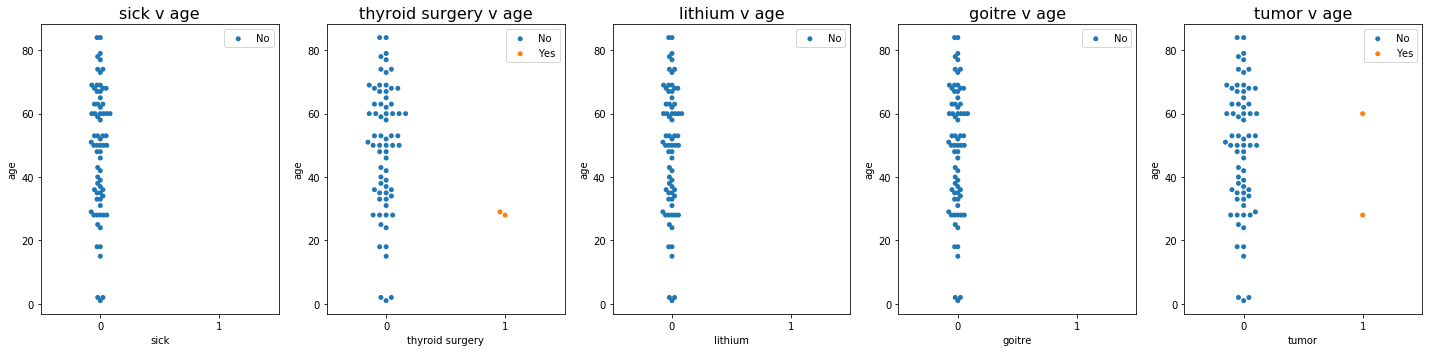

In [17]:
x_colnames = ['sick','thyroid surgery','lithium','goitre','tumor']
f, ax = plt.subplots(1,len(x_colnames),figsize=(20,5), sharex=True, sharey=False)
for i in range(len(x_colnames)):
    sns.swarmplot(x=male_thyroid[x_colnames[i]], y=male_thyroid['age'], data=male_thyroid, ax=ax[i]).legend(('No','Yes'))
    ax[i].set_title(str(x_colnames[i])+" v age", fontsize=16)
plt.tight_layout()

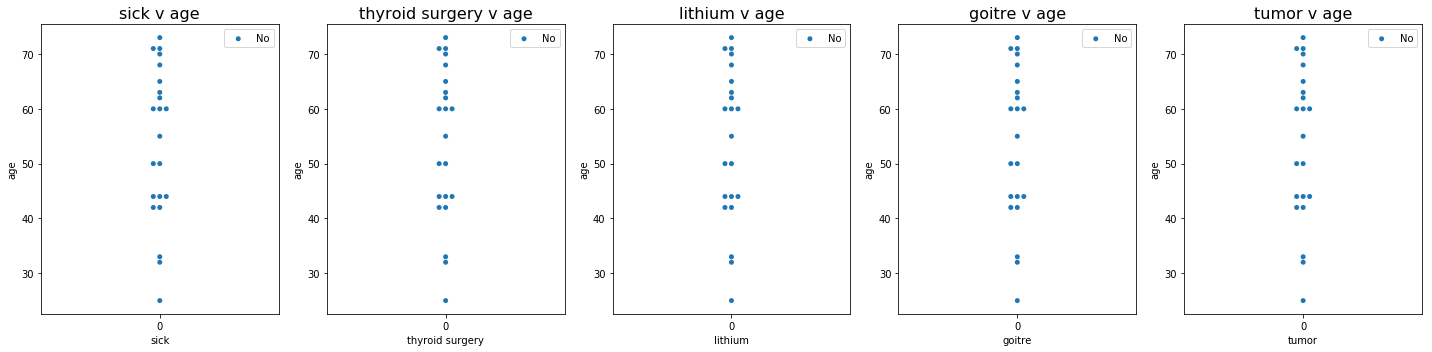

In [18]:
f, ax = plt.subplots(1,len(continuous_cols),figsize=(20,5), sharex=True, sharey=False)
for i in range(len(x_colnames)):
    sns.swarmplot(x=female_thyroid[x_colnames[i]], y=female_thyroid['age'], data=female_thyroid, ax=ax[i]).legend(('No','Yes'))
    ax[i].set_title(str(x_colnames[i])+" v age", fontsize=16)
plt.tight_layout()

### We see female sample with hyperthyroid do not suffer from any conditions.

### Let's check hyperthyroid sample measurements between genders and find any interesting pattern.

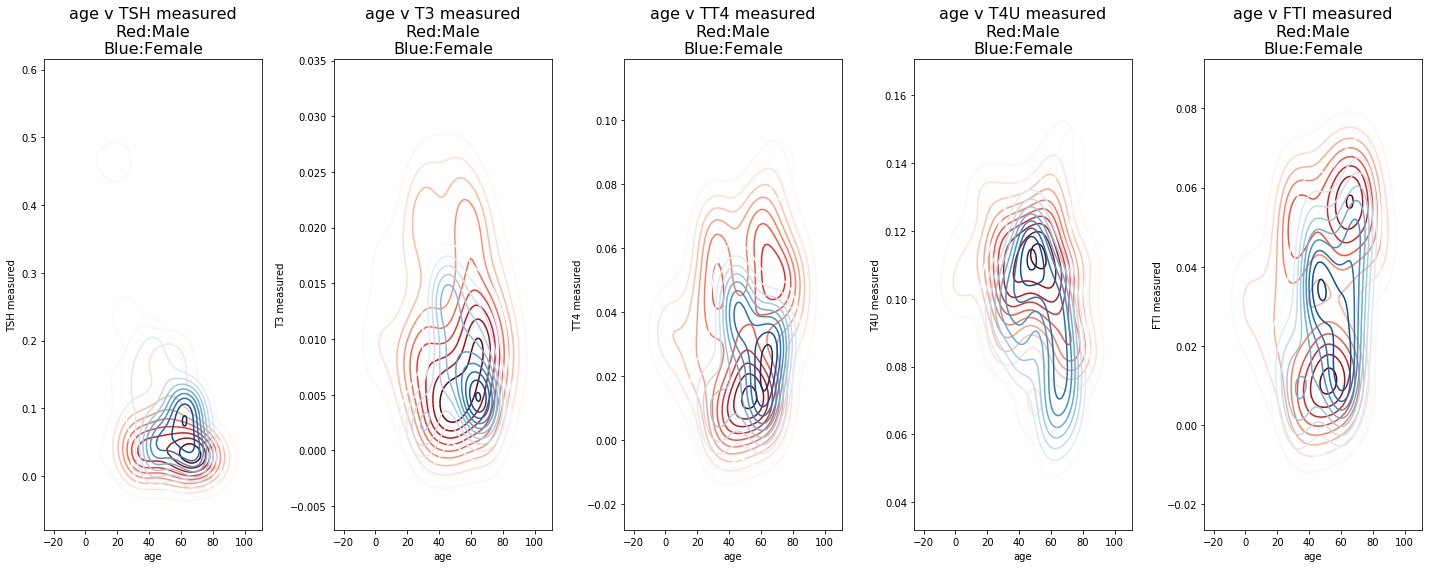

In [19]:
f, ax = plt.subplots(1,len(continuous_cols),figsize=(20,8), sharex=True, sharey=False)
for i in range(len(continuous_cols)):
    sns.kdeplot(male_thyroid['age'], male_thyroid[continuous_cols[i]],ax=ax[i], cmap='Reds',legend=True, shade=False)
    sns.kdeplot(female_thyroid['age'], female_thyroid[continuous_cols[i]],ax=ax[i], cmap='Blues', shade=False, legend=True)
    ax[i].set_title("age v " + str(continuous_cols[i]) + '\nRed:Male\nBlue:Female', fontsize=16)
plt.tight_layout()

### Now check hyperthyroid with the general sample measurements and see where the hyperthyroid lie.

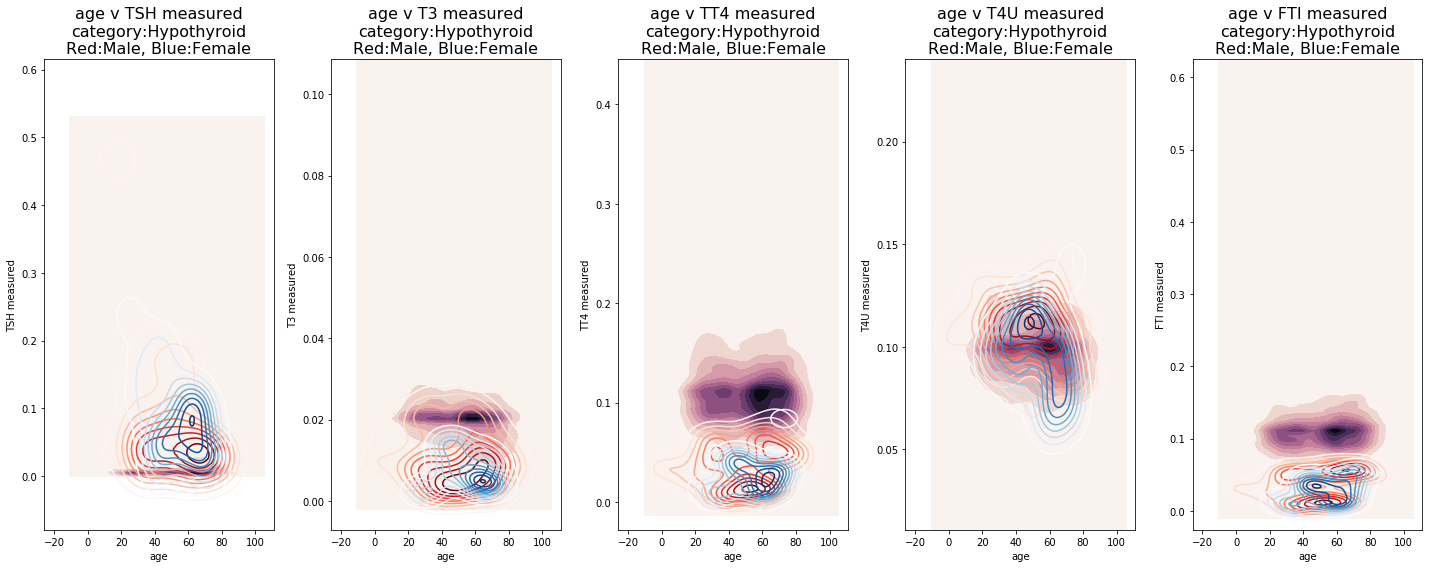

In [20]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
f, ax = plt.subplots(1,len(continuous_cols),figsize=(20,8), sharex=True, sharey=False)
for i in range(len(continuous_cols)):
    sns.kdeplot(train_df['age'], train_df[continuous_cols[i]],ax=ax[i], cmap=cmap, shade=True)
    sns.kdeplot(male_thyroid['age'], male_thyroid[continuous_cols[i]],ax=ax[i], cmap='Reds', shade=False)
    sns.kdeplot(female_thyroid['age'], female_thyroid[continuous_cols[i]],ax=ax[i], cmap='Blues', shade=False)
    ax[i].set_title("age v " + str(continuous_cols[i]) + '\ncategory:Hypothyroid\nRed:Male, Blue:Female', fontsize=16)
plt.tight_layout()

### We see where the measurements lie for hyperthyroid class.
### They seem to be lie a bit outside of the general sample.

### From the data set we first try to find some correlations between features.
### We use a heatmap to find correlations.

Text(0.5,1,'Heat map (correlations) between features.')

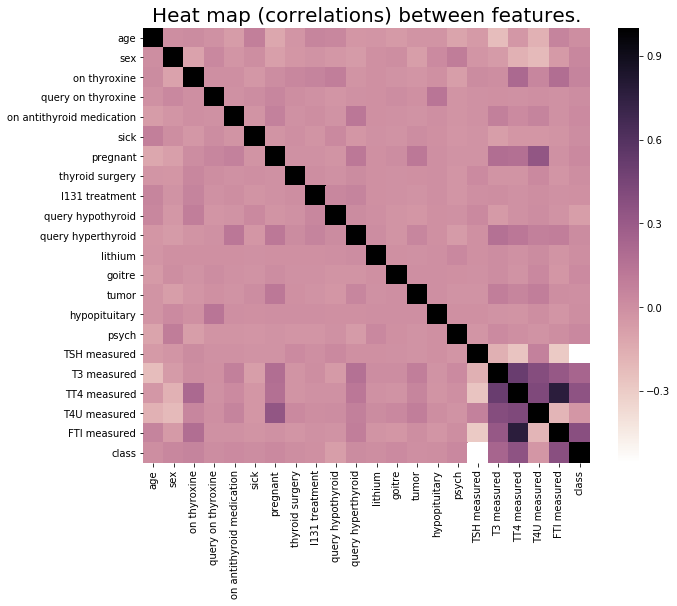

In [21]:
f, ax = plt.subplots(figsize=(10,8))
corr = train_df.corr()
#cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=False)
sns.heatmap(corr,cmap=cmap)
ax.set_title('Heat map (correlations) between features.', fontsize=20)

In [22]:
df_age = train_df[["age","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","class"]]
df_sex = train_df[["sex","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","class"]]
df_corr_age = df_age.corr()
df_corr_sex = df_sex.corr()

### From the heatmap, let's take a sub-section and see some correlations.

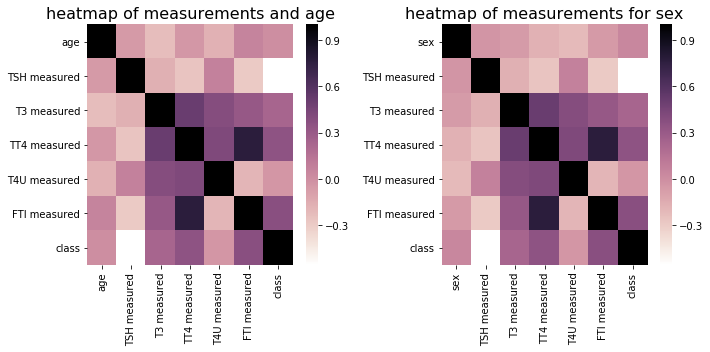

In [23]:
f, ax = plt.subplots( 1, 2, figsize=(10,5), sharex=False, sharey=False)
sns.heatmap(df_corr_age, ax=ax[0],cmap=cmap)
ax[0].set_title('heatmap of measurements and age', fontsize=16)
sns.heatmap(df_corr_sex, ax=ax[1],cmap=cmap)
ax[1].set_title('heatmap of measurements for sex', fontsize=16)
plt.tight_layout()

### Let's find where each class lie based on the measurements taken.
### We plot scatter plots using age, measurements and class.

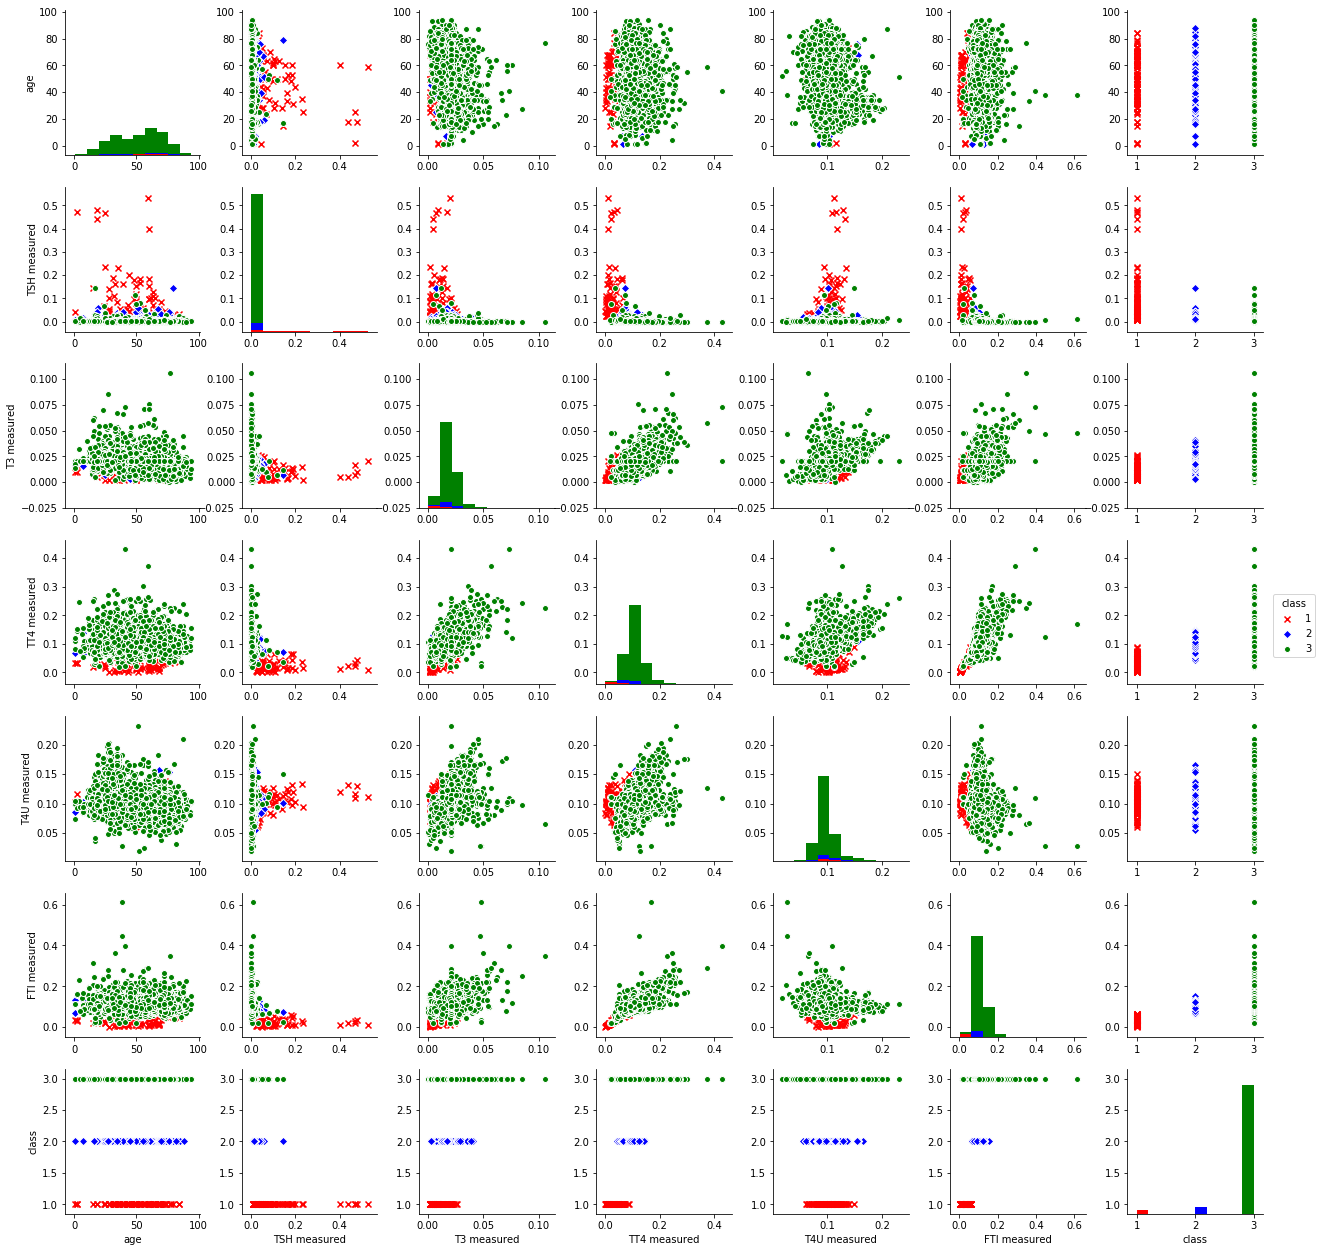

In [24]:
colorMap = {3:'green',2:'blue',1:'red'}
sns.pairplot(df_age, hue="class",  markers=["x", "D", "o"], palette=colorMap)
plt.show()

### plot scatter plots using sex, measurements and class.

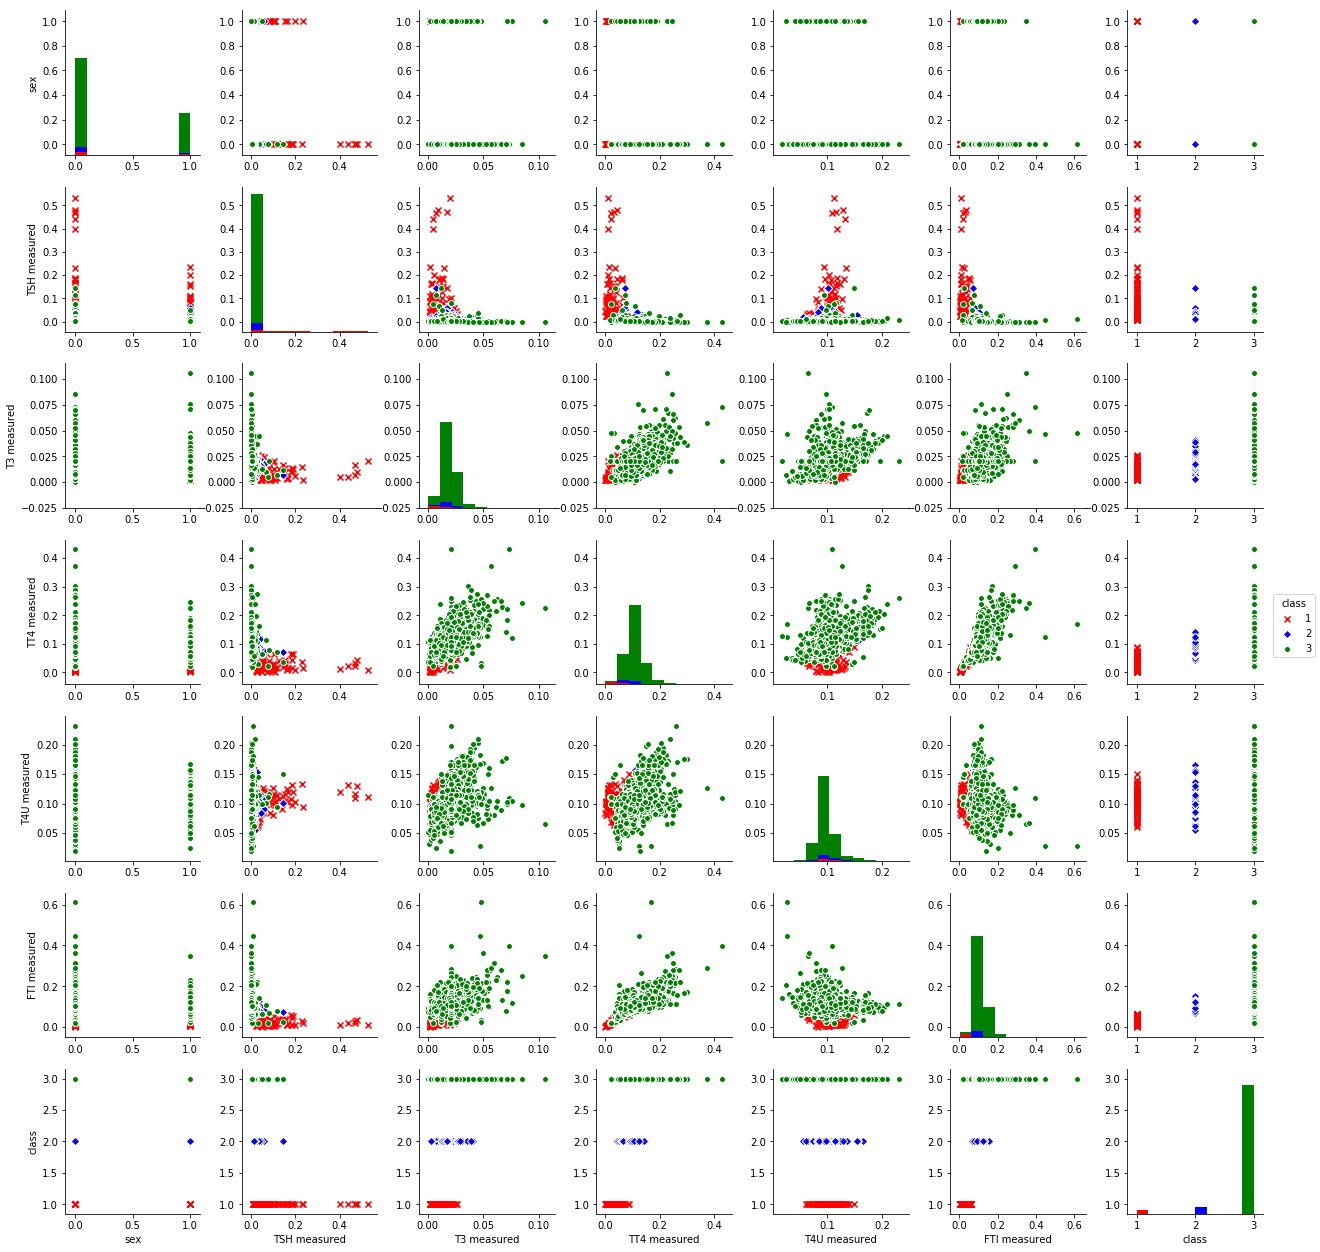

In [25]:
sns.pairplot(df_sex, hue="class",  markers=["x", "D", "o"], palette=colorMap)
plt.show()

### From the above scatter plots, we do see where hyperthyroid (class 1) lies vs normal (class 3).

### We conclude our exploraory analysis.
There are many factors to be looked at and considered when finding relation for a class. From the analysis we cannot single handedly point out a major factor effecting the class, each feature is contributing to distinguish between different class.

Note: When predicting a class lot of variables are to be addressed, since there are very few data points for non-normal (i.e, hyperthyroid, hypothyroid) class.